# データの類似性
教師なし学習の用途の一つとしてクラスタリングがある。その中でも樹形図を作成してデータ構造(距離)を可視化する「デンドログラム(階層型クラスタリング)」とあらかじめ集合の数を定義してラベリングをするもので代表的な手法として「k-means法」がある。
ここで類似度の指標は特徴量同士のユークリッド距離とする。

# ライブラリのインポート

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# データの読み込み

In [ ]:
df = pd.read_csv("wine.csv", encoding="shift-jis")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# 説明変数(X)と目的変数(Y)を分離

In [ ]:
y_name = "Wine"
y = df[y_name].values
x_table = df.drop(y_name, axis=1)
x_name = x_table.columns
x = x_table.values
x = preprocessing.minmax_scale(x)
df = pd.DataFrame(x)
df.columns = x_name
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


#階層型クラスタリング
methodには中心座標を計算する方法を入れ、metricには距離の計算方法を入れる。
ここでは一般的な計測方法として重心(ベクトルの平均値)とユークリッド距離を用いる。

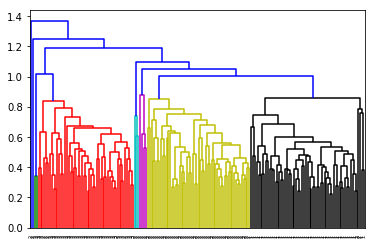

In [ ]:
Z = linkage(df, method="average", metric="euclidean")
dendrogram(Z, labels=y)
plt.savefig("dendro.pdf")
plt.show()

# k-means法の宣言と学習

In [ ]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

# 予測

In [ ]:
y_pred = model.predict(x)

# 予測結果を特徴量の配列に結合してデータフレームを作成

In [ ]:
y_pred = y_pred.reshape(-1, 1)
data = np.hstack((y_pred, x))
dfo = pd.DataFrame(data)
col = []
col.append(y_name)
for c in x_name:
    col.append(c)
dfo.columns = col
dfo.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,0.0,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


In [ ]:
dfo.to_csv("wine_cluster.csv", index=False)